## Homework 4 (bar charts)

For this homework assignment you are required to use Python (pandas and matplotlib) to do the exercises. Please write your own code and provide your code along with your responses to the questions. 

### Getting Started

Import the following libraries to use in the homework set:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# I found this other libraries necessary
import numpy as np
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

Matplotlib is building the font cache; this may take a moment.


For this homework we will use a world immigration/emigration data set for the years 1980 to 2013. The data set shows the numbers of people moving in and out of 45 different countries each year based on place of birth, citizenship, or place of previous / next residence.
* Data source:  [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows)

From the previous homework set, we grouped together all immigrant and all emigrant rows. To ensure consistency, please begin by loading the "immigrants.csv" and "emigrants.csv" files that are provided on Canvas. 


In [2]:
df_immigrants = pd.read_csv("immigrants.csv", index_col = 0)
df_emigrants = pd.read_csv("emigrants.csv", index_col = 0)

### Problem 1 (3 points)

Using the **immigration** data, make two bar charts. You may use vertical or horizontal bars for either chart. 
* Bar chart 1 -- compare the number of immigrants to the following countries in the year **2000**:  Australia, New Zealand, Belgium, Italy, and the Netherlands
* Bar chart 2 -- compare the number of immigrants to Australia across the years **1995 to 2004** (inclusive) 

For each chart, 
* Sort the categories in a way that makes sense (e.g. high to low or alphabetical for chart 1, by time for chart 2)
* Label the bar values directly (you can adjust the units to make the labels fit)
* Remove unnecessary axis lines or legends
* Add a title and a description of the units
* Make all text horizontal


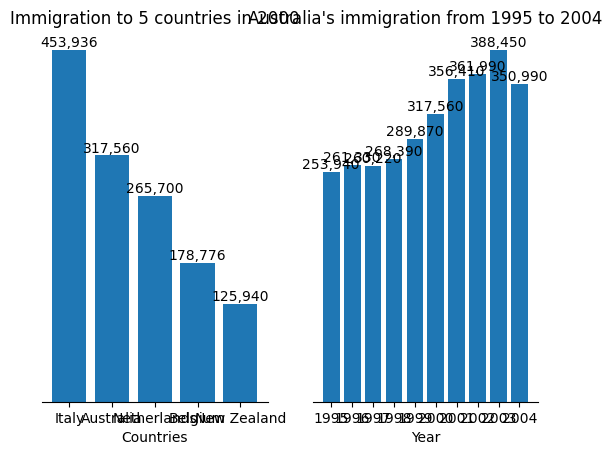

In [3]:
countries: tuple[str, ...] = "Australia", "New Zealand", "Belgium", "Italy", "Netherlands"
years: list[str] = [str(year) for year in range(1995, 2005)]

interest_data_2000: pd.DataFrame = \
    df_immigrants[df_immigrants["CntName"].isin(countries)][["CntName"]]
interest_data_2000["immigrants"] = \
    df_immigrants[df_immigrants["CntName"].isin(countries)]["2000"]
interest_data_2000["emigrants"] = \
    df_emigrants[df_emigrants["CntName"].isin(countries)]["2000"]
interest_data_2000.sort_values(by="immigrants",ascending=False, inplace=True)

interest_data_aus: pd.DataFrame = \
    pd.DataFrame(index=pd.Index(years))
interest_data_aus["immigrants"] = df_immigrants[df_immigrants["CntName"] == "Australia"][years].T
interest_data_aus["emigrants"] = df_emigrants[df_emigrants["CntName"] == "Australia"][years].T
interest_data_aus.sort_index(ascending=True, inplace=True)

def make_barcharts():
    """Problem 1""" 
    _, axes = plt.subplots(1,2)

    """2000s"""
    country_bars = axes[0].bar(
        interest_data_2000.CntName, interest_data_2000.immigrants
        # color = interest_data_2000.color
    )
    axes[0].bar_label(
        country_bars,
        labels = [
            f'{value:,}' for value
            in interest_data_2000.immigrants.astype('int64').values
        ]
    ) # Labels bars directly
    axes[0].set(
        title="Immigration to 5 countries in 2000",
        xlabel="Countries", ylabel="Population"
    )

    """Australia's"""
    years_bar = axes[1].bar(
        interest_data_aus.index, interest_data_aus.immigrants
    )

    axes[1].bar_label( # Labels bars directly
        years_bar,
        labels=[f'{value:,}' for value in interest_data_aus.immigrants.astype('int64').values]
    )
    axes[1].set(
        title="Australia's immigration from 1995 to 2004", # Title
        xlabel="Year", ylabel="Population",
    )

    for ax in axes: # Remove axis lines
        ax.spines[["left","right","top"]].set_visible(False)
        ax.yaxis.set_visible(False)

    plt.show()

make_barcharts()

### Problem 2 (2 points)

Adjust your previous bar charts to present the "lollipop" chart style. 
* Reduce the width of the bars 
* For chart 1, place a small image of each country's flag at the top of its bar so that the top of the flag is aligned vertically with the top of the bar (images on Canvas are provided from https://www.countryflags.com/ ) 
* For chart 2, place a circle at the top of each bar (use the top of the bar as the center coordinate of the circle, and make sure the circles do not overlap)
* You may need to adjust the positioning of the bar values

Some hints
* Check out documentation online or this article https://towardsdatascience.com/how-to-add-an-image-to-a-matplotlib-plot-in-python-76098becaf53 to add images to pyplot charts 
* A scatter plot makes for a great way to include circles!


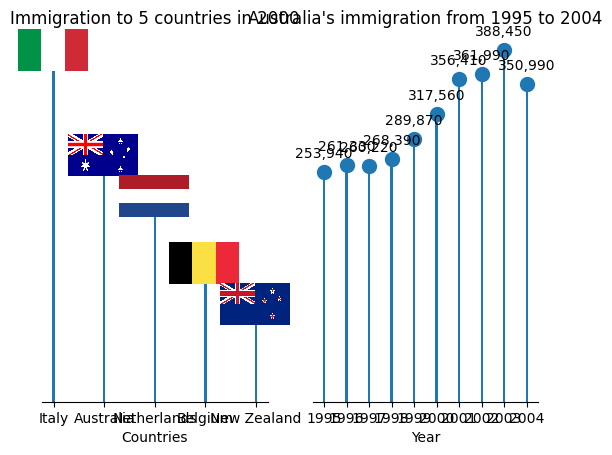

In [4]:
def make_lollypop():
    """Problem 2""" 
    _, axes = plt.subplots(1,2)

    """2000s"""
    country_bars = axes[0].bar(
        interest_data_2000.CntName, interest_data_2000.immigrants,
        width=0.05
        # color = interest_data_2000.color
    )
    axes[0].bar_label(
        country_bars,
        labels = [
            f'{value:,}' for value
            in interest_data_2000.immigrants.astype('int64').values
        ]
    ) # Labels bars directly
    axes[0].set(
        title="Immigration to 5 countries in 2000",
        xlabel="Countries", ylabel="Population"
    )

    # Add flags
    for country, bar in zip(interest_data_2000.CntName, country_bars):
        # print(f"{country[:3].lower()}.jpg")
        image = Image.open(f"./flags/{country[:3].lower()}.jpg").resize((1000,600))
        flag = np.asarray(image)

        # flag = image.imread(f"./flags/{country[:3].lower()}.jpg")
        imagebox = OffsetImage(flag, zoom=0.05)
        ab = AnnotationBbox(imagebox, (bar.get_x(), bar.get_height()), frameon=False)
        axes[0].add_artist(ab)

    """Australia's"""
    years_bar = axes[1].bar(
        interest_data_aus.index, interest_data_aus.immigrants,
        width=0.1
    )

    axes[1].bar_label( # Labels bars directly
        years_bar,
                      padding=8,
        labels=[f'{value:,}' for value in interest_data_aus.immigrants.astype('int64').values]
    )
    axes[1].set(
        title="Australia's immigration from 1995 to 2004", # Title
        xlabel="Year", ylabel="Population",
    )

    for ax in axes: # Remove axis lines
        ax.spines[["left","right","top"]].set_visible(False)
        ax.yaxis.set_visible(False)

    axes[1].scatter(
        interest_data_aus.index, interest_data_aus.immigrants,
        color='#1f77b4', s=100
    )

    plt.show()

make_lollypop()

### Problem 3 (3 points)

Adjust your bar charts from part 1 to be "paired" bar charts that now include **emigration** data for each category.
* Use contrasting colors (e.g. "tab:blue" for immigration bars and "tab:orange" for emigration bars)
* Instead of labelling bars directly, use light gridlines that run perpendicular to the bars and reinstate a units axis 
* Adjust the titles of your charts and include the legend directly by coloring words like "Immigrant" and "Emigrant" appropriately

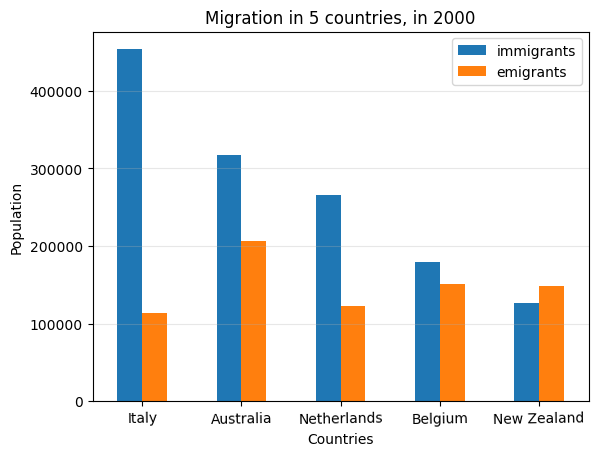

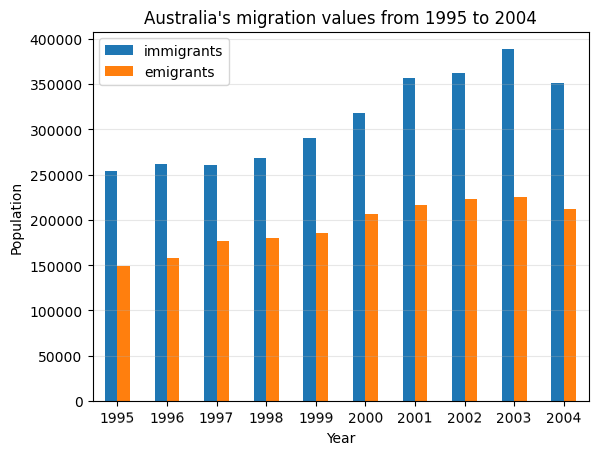

In [5]:
def make_paired_bars():
    """Problem 3""" 
    """2000s"""

    axes = interest_data_2000.plot.bar("CntName", ["immigrants", "emigrants"])
    axes.tick_params(
        axis='x', labelrotation=1.0
    )
    axes.yaxis.grid(visible=True)
    axes.tick_params(axis='y', grid_alpha=0.3)
    # axes.legend.

    # Labels bars directly
    axes.set(
        title="Migration in 5 countries, in 2000",
        xlabel="Countries", ylabel="Population"
    )

    """Australia's"""
    axes = interest_data_aus.plot.bar(y=["immigrants", "emigrants"])
    axes.tick_params(
        axis='x', labelrotation=1.0
    )
    axes.yaxis.grid(visible=True)
    axes.tick_params(axis='y', grid_alpha=0.3)

    axes.set(
        title="Australia's migration values from 1995 to 2004", # Title
        xlabel="Year", ylabel="Population",
    )

    plt.show()
    
make_paired_bars()

### Problem 4 (2 points)

Adjust your bar charts from part 3 to be "diverging" bar charts 
* Use horizontal bars, with zero as the center value
* Place immigration bars to the right of center, and emigration bars to the left of center 

One trick to create a diverging bar chart in pyplot is to use both positive and negative values
* Make sure to relabel the units axis so that all numbers are positive though 

### Examples

Here are some charts to compare your work against. You do not have to recreate these exactly, but they should help give you an idea of what to make.

Problem 1:

In [ ]:
# Chart 1

In [ ]:
# Chart 2 

Problem 2

In [ ]:
# Chart 1 

In [ ]:
# Chart 2 

Problem 3

In [ ]:
# Chart 1

In [ ]:
# Chart 2

Problem 4

In [ ]:
# Chart 1

In [ ]:
# Chart 2